In [1]:
import sys
sys.path.insert(1, 'C:\\Users\\jones\\git\\gempydefaulting\\')
import gempyModelBuilder as gpmb
import gempy as gp
import numpy as np
import pandas as pd
import geopandas as gpd
from gempy_engine.core.data.stack_relation_type import StackRelationType

Setting Backend To: AvailableBackends.numpy


In [2]:
'''New inputs are needed to constrain the model better'''
#Adding some surfaces that were gathered from the observation model built in Petrel

#Redundancy for pointers so I can peel this off later

data_path = 'D:\\Working_Notebooks\\gempy_model_constructor\\'
path='D:\\Working_Notebooks\\gempy_model_constructor\\Californie_Mod_5_surfaces\\'

#formation surfaces from Petrel
Surf_nsg_pointer = 'NLM_depth_cal_square_surface'
Surf_carb_pointer = 'Top_carboniferous_surface'
Surf_Zee_pointer = 'Top_Zeeland_Surface'

# oops this should be a Petrel surface, but I seem to have exported a shapefile
Surf_banjaard_pointer = 'Top_Banjaard_mod5.shp'

#Fault land surface traces... shapefiles
obs_tegelen_surface_trace = 'tegelen_surface_trace.shp'
obs_dulkener_surface_trace = 'dulkener_surface_trace.shp'
obs_belfeld_surface_trace = 'belfeld_surface_trace.shp'

#fault contacts with formations
obs_top_carbon_contacts = 'Top_carboniferous_contacts.shp'
obs_top_zeeland_contacts = 'Top_Zeeland_contacts.shp'
obs_nsg_contacts = 'NSG_contacts.shp'

In [3]:
# loading surface 

cols = ['X', 'Y', 'Z','col','row', 'depth', 'depth1', 'depth2'] #while reading the csv the first column will not start at the head of the row with is the 'X' entry without this redundant 'depth2' column name, which is filled with NaN comisch...

nsg_surf = pd.read_csv(path+Surf_nsg_pointer, sep=' ', names=cols, skiprows=np.arange(20))  # delimiter is a 'space' and f
carb_surf = pd.read_csv(path+Surf_carb_pointer, sep=' ', names=cols, skiprows=np.arange(20))
zee_surf = pd.read_csv(path+Surf_Zee_pointer, sep=' ', names=cols, skiprows=np.arange(20))

#handling Banjaard surface a little differently...
#ban_surf = pd.read.csv(path+Surf_banjaard_pointer, sep=' ', names=cols, skiprows=np.arange(20))

#loading contacts
topNSG_contact_points = gpd.read_file(path + obs_nsg_contacts)
nsg_contacts_ = topNSG_contact_points.geometry

topCarb_contact_points = gpd.read_file(path + obs_top_carbon_contacts)
carb_contacts_ = topCarb_contact_points.geometry

topZee_contact_points = gpd.read_file(path + obs_top_zeeland_contacts)
Zee_contacts_ = topZee_contact_points.geometry

teg_surface_trace = gpd.read_file(path + obs_tegelen_surface_trace)
teg_surfT = teg_surface_trace.geometry

dulk_surface_trace = gpd.read_file(path + obs_dulkener_surface_trace)
dulk_surfT = dulk_surface_trace.geometry

beld_surface_trace = gpd.read_file(path + obs_belfeld_surface_trace)
beld_surfT = beld_surface_trace.geometry

#loading a surface (Banyaard) as a shapefile 

ban_surf_df = gpd.read_file(path + Surf_banjaard_pointer)
ban_surf = ban_surf_df.geometry


In [4]:
spacing = 40
zee_step = zee_surf[zee_surf['row']%spacing==0]
zee = zee_step[zee_step['col']%spacing==0]

nsg_step = nsg_surf[nsg_surf['row']%spacing==0]
nsg = nsg_step[nsg_step['col']%spacing==0]

carb_step = carb_surf[carb_surf['row']%spacing==0]
carb = carb_step[carb_step['col']%spacing==0]

ban_step = ban_surf_df[::90]
ban_step = ban_step[::-1]
ban_step = ban_step[::40]
ban = ban_step.geometry

BAN = pd.DataFrame(None)
BAN['X'] = ban.x
BAN['Y'] = ban.y
BAN['Z'] = ban.z
BAN['polarity'] = 1
BAN['formation'] = 'Zeeland'
BAN['dip'] = 0
BAN['azimuth'] = 0
BAN['Z'] = 3000-BAN['Z']*-1

ZEE = pd.DataFrame(None)
ZEE = zee
ZEE['polarity'] = 1
ZEE['formation'] = 'Namurian'
ZEE['dip'] = 0
ZEE['azimuth'] = 0
ZEE['Z'] = 3000-ZEE['Z']*-1

ZEEC = pd.DataFrame(None)
ZEEC['X'] =Zee_contacts_.geometry.x
ZEEC['Y'] =Zee_contacts_.geometry.y
ZEEC['Z'] =Zee_contacts_.geometry.z
ZEEC['polarity'] = 1
ZEEC['formation'] = 'Namurian'
ZEEC['dip'] = 0
ZEEC['azimuth'] = 0
ZEEC['Z'] = 3000-ZEEC['Z']*-1

CARB = pd.DataFrame(None)
CARB = carb
CARB['polarity'] = 1
CARB['formation'] = 'Mesozoic'
CARB['dip'] = 0
CARB['azimuth'] = 0
CARB['Z'] = 3000-CARB['Z']*-1

CARBC = pd.DataFrame(None)
CARBC['X'] =carb_contacts_.geometry.x
CARBC['Y'] =carb_contacts_.geometry.y
CARBC['Z'] =carb_contacts_.geometry.z
CARBC['polarity'] = 1
CARBC['formation'] = 'Mesozoic'
CARBC['dip'] = 0
CARBC['azimuth'] = 0
CARBC['Z'] = 3000-CARBC['Z']*-1

NSG = pd.DataFrame(None)
NSG = nsg
NSG['polarity']= 1
NSG['formation'] = 'NSG'
NSG['dip'] = 0
NSG['azimuth'] = 0
NSG['Z'] = 3000-NSG['Z']*-1

NSGC = pd.DataFrame(None)
NSGC['X'] = nsg_contacts_.x
NSGC['Y'] = nsg_contacts_.y
NSGC['Z'] = nsg_contacts_.z
NSGC['polarity'] = 1
NSGC['formation'] = 'NSG'
NSGC['dip'] = 0
NSGC['azimuth'] = 0
NSGC['Z'] = 3000-NSGC['Z']*-1

TEG = pd.DataFrame(None)
TEG['X'] = teg_surface_trace.geometry.x
TEG['Y'] = teg_surface_trace.geometry.y
TEG['Z'] = 3000#-teg_surface_trace.geometry.z*-1

DULK = pd.DataFrame(None)
DULK['X'] = dulk_surface_trace.geometry.x
DULK['Y'] = dulk_surface_trace.geometry.y
DULK['Z'] = 3000#-dulk_surface_trace.geometry.z*-1

BELD = pd.DataFrame(None)
BELD['X'] = beld_surface_trace.geometry.x
BELD['Y'] = beld_surface_trace.geometry.y
BELD['Z'] = 3000#-dulk_surface_trace.geometry.z*-1

#TEG = 
TEG['polarity'] = 1
TEG['formation'] = 'Tegelen'
TEG['dip'] =   64
TEG['azimuth'] = 40

#DULK = 
DULK['polarity'] = 1
DULK['formation'] = 'Dulkener'
DULK['dip'] =   64
DULK['azimuth'] = 40

#BELD = 
BELD['polarity'] = 1
BELD['formation'] = 'Belfeld'
BELD['dip'] =   64
BELD['azimuth'] = 40

#SubTEG['Z'] = SubTEG['Z']

interfacesurf = pd.DataFrame(None)
interfacessurf = pd.concat((NSG, NSGC, CARB, CARBC, ZEE, ZEEC, BAN))
interfacessurf = interfacessurf[['X','Y','Z','polarity','formation','azimuth','dip']]

#interfaces = pd.merge(interfaces, SubTEG, how='inner')
teg_surf_intermediate = pd.concat((TEG[['X','Y','Z','polarity','formation','azimuth','dip']],
                                  DULK[['X','Y','Z','polarity','formation','azimuth','dip']],
                                  BELD[['X','Y','Z','polarity','formation','azimuth','dip']]))
#
interfacessurf = pd.concat((interfacessurf,teg_surf_intermediate))
interfacessurf.head()
orientationssurf = interfacessurf.sample(n=100).reset_index()
orientationssurf

C:\Users\Jones\AppData\Local\Temp\ipykernel_8524\2439895050.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZEE['polarity'] = 1
C:\Users\Jones\AppData\Local\Temp\ipykernel_8524\2439895050.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZEE['formation'] = 'Namurian'
C:\Users\Jones\AppData\Local\Temp\ipykernel_8524\2439895050.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,index,X,Y,Z,polarity,formation,azimuth,dip
0,44918,208845.000000,382549.000000,2325.653931,1,NSG,0,0
1,32,204205.311974,376714.762629,3000.000000,1,Tegelen,40,64
2,21,209378.238600,380940.074707,3000.000000,1,Dulkener,40,64
3,78839,204895.000000,388599.000000,2102.451477,1,Namurian,0,0
4,14,203767.955306,394236.013881,2423.690208,1,NSG,0,0
...,...,...,...,...,...,...,...,...
95,56479,210895.000000,384599.000000,1796.685547,1,Namurian,0,0
96,20,194244.264252,380791.922714,2146.464526,1,Mesozoic,0,0
97,22358,204845.000000,378549.000000,2325.290588,1,NSG,0,0
98,56198,210845.000000,384549.000000,2302.271667,1,NSG,0,0


In [5]:
FAULT = StackRelationType.FAULT
ERODE = StackRelationType.ERODE
ONLAP = StackRelationType.ONLAP



data_path = 'D:\\Working_Notebooks\\gempy_model_constructor\\'
interfacessurf.to_csv('realsurf.csv')
orientationssurf.to_csv('surf_orients.csv')
orients = 'surf_orients.csv'
surface_points = 'realsurf.csv'
project_name = 'Californie model 5'
extents = [197000,210000,375000,387000,0,3000]   #[Xmin, Xmax, Ymin, Ymax, Zmin, Zmax]
formation_map_type = {   "Tegelen_fault": ['Tegelen',  FAULT],
                    "Dulkener_fault": [ 'Dulkener', FAULT],
                    "Befeld_fault" : ['Belfeld' , FAULT],
                    "Cenezoic": ['NSG', ERODE],
                    "Mesozoic" : ['Mesozoic', ONLAP],
                    "Paleozoic" : [ ('Namurian', 'Zeeland') , ERODE]
                    #"Paleozoic Series": ('Top_Carboniferous', 'Top_zeeland')
                }
ones = np.ones(9).reshape(3,3)
zeros = np.zeros(9).reshape(3,3)
fault_relations = np.vstack((np.hstack((zeros,ones)),np.hstack((zeros,zeros))))

# formation_map = {key: value[0] for key, value in formation_map_type.items()}

# stack_relation = {key: value[1] for key, value in formation_map_type.items()}

# range(len(stack_relation))

# for i, relation in zip(range(len(stack_relation)), stack_relation):
#     print(str(i)+str(stack_relation[relation]))

In [6]:
cali = gpmb.create_gempy_model(surface_points, orients, extents, formation_map_type, fault_relations, data_path=data_path, refinement=2, project_name=project_name).return_geo_data()

Setting Backend To: AvailableBackends.numpy


c:\Users\Jones\.conda\envs\gempy\Lib\site-packages\pyvista\jupyter\notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


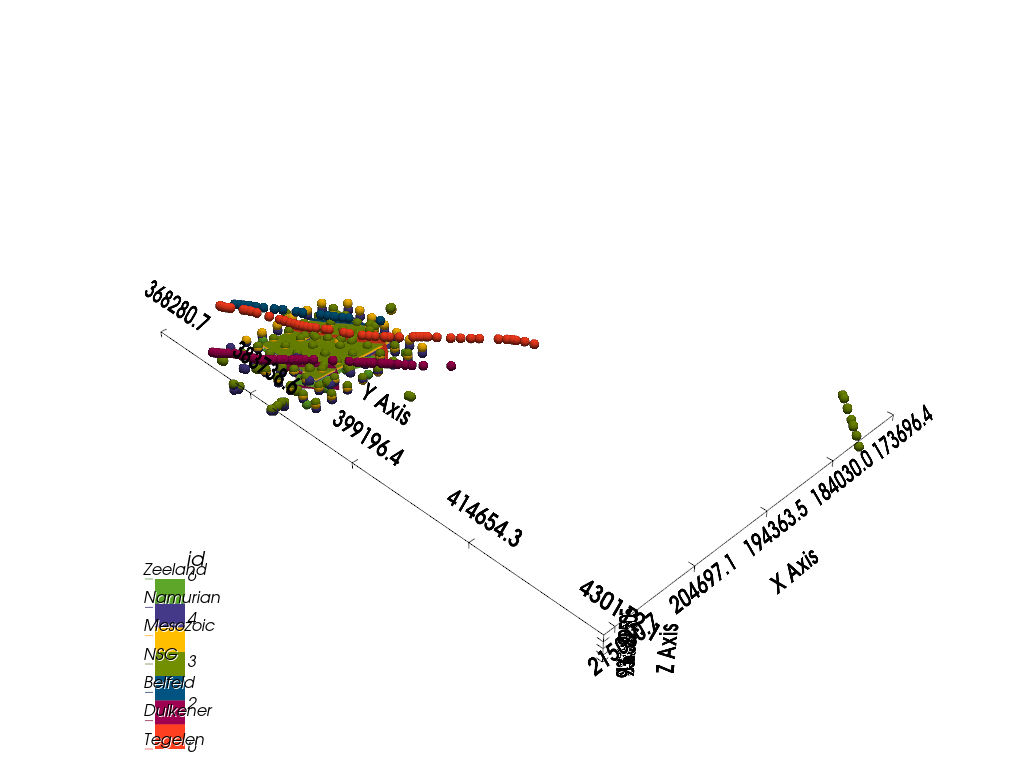

In [8]:
import gempy_viewer as gpv

#type(cali)


gpv.plot_3d(cali, show_data=True, show_boundaries=True, show_lith=False, kwargs_plotter={'notebook' : True})